# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [1]:
data_dir = './data'

# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
#data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

Found mnist Data
Found celeba Data


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

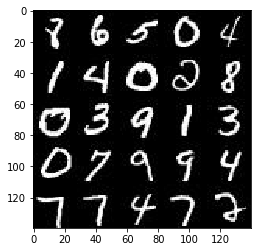

In [2]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

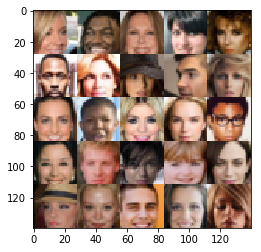

In [3]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [4]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.1.0


/Users/vishwajeetmarwah/miniconda3/envs/dlnd/lib/python3.6/site-packages/ipykernel_launcher.py:14: UserWarning: No GPU found. Please use a GPU to train your neural network.
  


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [5]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # TODO: Implement Function
    input_real = tf.placeholder(tf.float32, (None, image_width, image_height, 
                                             image_channels), name='input_real')
    input_z = tf.placeholder(tf.float32, (None, z_dim), name='input_z')
    learning_rate = tf.placeholder(tf.float32, None, name='learning_rate')
    return input_real, input_z, learning_rate


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

Tests Passed


### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the discriminator, tensor logits of the discriminator).

In [6]:
def discriminator(images, reuse=False):
    """
    Create the discriminator network
    :param images: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    # TODO: Implement Function
    alpha = 0.2
    stddev = 0.02 
    keep_prob = 0.5
    with tf.variable_scope('discriminator', reuse=reuse):
        # Input layer is 28x28x3 or 28x28x1
        x1 = tf.layers.conv2d(images, 64, 5, strides=2, padding='same',
                              kernel_initializer=tf.random_normal_initializer(stddev=stddev))
        relu1 = tf.maximum(alpha*x1, x1)
        relu1 = tf.layers.dropout(relu1, keep_prob, training=True)
        # 14x14x64
        
        x2 = tf.layers.conv2d(relu1, 128, 5, strides=2, padding='same',
                              kernel_initializer=tf.random_normal_initializer(stddev=stddev))
        bn2 = tf.layers.batch_normalization(x2, training=True)
        relu2 = tf.maximum(alpha*bn2, bn2)
        relu2 = tf.layers.dropout(relu2, keep_prob, training=True)
        # 7x7x128

        x3 = tf.layers.conv2d(relu2, 256, 5, strides=2, padding='same',
                              kernel_initializer=tf.random_normal_initializer(stddev=stddev))
        bn3 = tf.layers.batch_normalization(x3, training=True)
        relu3 = tf.maximum(alpha*bn3, bn3)
        relu3 = tf.layers.dropout(relu3, keep_prob, training=True)  
        # 4x4x256
        
        # Flatten it
        flat = tf.reshape(relu3, (-1, 4*4*256))
        logits = tf.layers.dense(flat, 1, kernel_initializer=tf.random_normal_initializer(stddev=stddev))
        out = tf.sigmoid(logits)

    return out, logits

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [7]:
def generator(z, out_channel_dim, is_train=True):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    # TODO: Implement Function
    alpha = 0.2
    stddev = 0.02
    reuse = not is_train
    #keep_prob = 0.5
    with tf.variable_scope('generator', reuse=reuse):
        # Fully connected layer
        x1 = tf.layers.dense(z, 7*7*256, kernel_initializer=tf.random_normal_initializer(stddev=stddev))
        
        # Reshape to start the convolutional stack
        x1 = tf.reshape(x1, (-1, 7, 7, 256))
        x1 = tf.layers.batch_normalization(x1, training=is_train)
        #x1 = tf.maximum(alpha*x1, x1)
        x1 = tf.nn.relu(x1)
        # 7x7x256
        
        x2 = tf.layers.conv2d_transpose(x1, 128, 5, strides=2, padding='same',
                                        kernel_initializer=tf.random_normal_initializer(stddev=stddev))
        x2 = tf.layers.batch_normalization(x2, training=is_train)
        #x2 = tf.maximum(alpha*x2, x2)
        x2 = tf.nn.relu(x2)
        #x2 = tf.layers.dropout(x2, keep_prob, training=is_train)
        # 14x14x128
        
        x3 = tf.layers.conv2d_transpose(x2, 64, 5, strides=2, padding='same',
                                        kernel_initializer=tf.random_normal_initializer(stddev=stddev))      
        x3 = tf.layers.batch_normalization(x3, training=is_train)
        #x3 = tf.maximum(alpha*x3, x3)
        x3 = tf.nn.relu(x3)
        #x3 = tf.layers.dropout(x3, keep_prob, training=is_train)  
        # 28x28x64   
        
        # Output layer, 28x28xout_channel_dim
        logits = tf.layers.conv2d_transpose(x3, out_channel_dim, 5, strides=1, padding='same',
                                            kernel_initializer=tf.random_normal_initializer(stddev=stddev))
        out = tf.tanh(logits)
    
    return out

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [8]:
def model_loss(input_real, input_z, out_channel_dim):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    # TODO: Implement Function
    
    smooth = 0.9
    g_model = generator(input_z, out_channel_dim, is_train=True)
    d_model_real, d_logits_real = discriminator(input_real, reuse=False)
    d_model_fake, d_logits_fake = discriminator(g_model, reuse=True)
    
    d_loss_real = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(
            logits=d_logits_real, labels=tf.ones_like(d_model_real)*smooth))
    d_loss_fake = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(
            logits=d_logits_fake, labels=tf.zeros_like(d_model_fake)))
    g_loss = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(
            logits = d_logits_fake, labels=tf.ones_like(d_model_fake)))
    
    d_loss = d_loss_real + d_loss_fake
    
    return d_loss, g_loss

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [9]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # TODO: Implement Function
    
    t_vars = tf.trainable_variables()
    d_vars = [var for var in t_vars if var.name.startswith('discriminator')]
    g_vars = [var for var in t_vars if var.name.startswith('generator')]
    
    with tf.control_dependencies(tf.get_collection(tf.GraphKeys.UPDATE_OPS)):
        d_train_opt = tf.train.AdamOptimizer(learning_rate=learning_rate, beta1=beta1).minimize(d_loss, var_list=d_vars)
        g_train_opt = tf.train.AdamOptimizer(learning_rate=learning_rate, beta1=beta1).minimize(g_loss, var_list=g_vars)

    return d_train_opt, g_train_opt

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [10]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [11]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    # TODO: Build Model

    # For statistic print
    steps = 0
    print_every = 20
    show_every = 100    
    
    
    # inputs, losses and optimizers
    input_real, input_z, _ = model_inputs(*data_shape[1:4], z_dim)
    d_loss, g_loss = model_loss(input_real, input_z, data_shape[3])
    d_opt, g_opt = model_opt(d_loss, g_loss, learning_rate, beta1)    
    
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for e in range(epoch_count):
            for batch_images in get_batches(batch_size):
                # TODO: Train Model
                steps += 1
                
                # reshape and re-scale batch image
                batch_images = batch_images.reshape(batch_size, *data_shape[1:4])
                batch_images = batch_images*2
                
                # Sample random noise for Generator
                batch_z = np.random.uniform(-1, 1, size=(batch_size, z_dim))
                
                # run optimizers 
                _ = sess.run(d_opt, feed_dict={input_real: batch_images, input_z: batch_z})
                _ = sess.run(g_opt, feed_dict={input_real: batch_images, input_z: batch_z})
                # run g_opt twice to make sure d_loss does not go to zero
                _ = sess.run(g_opt, feed_dict={input_real: batch_images, input_z: batch_z})
                
                # print losses 
                if steps%print_every == 0:
                    train_loss_d = d_loss.eval(feed_dict={input_real: batch_images, input_z: batch_z})
                    train_loss_g = g_loss.eval(feed_dict={input_z: batch_z})
                    print("Epoch {}/{}...".format(e+1, epoch_count),
                          "Step {}...".format(steps),
                          "Discriminator Loss: {:.4f}...".format(train_loss_d),
                          "Generator Loss: {:.4f}".format(train_loss_g))
                    
                # show generator output every 100 batches
                if steps%show_every == 0:
                    show_generator_output(sess, 32, input_z, data_shape[3], data_image_mode)

                

### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

Epoch 1/2... Step 20... Discriminator Loss: 2.0539... Generator Loss: 0.8916
Epoch 1/2... Step 40... Discriminator Loss: 1.3795... Generator Loss: 1.3360
Epoch 1/2... Step 60... Discriminator Loss: 1.8708... Generator Loss: 0.6915
Epoch 1/2... Step 80... Discriminator Loss: 1.6388... Generator Loss: 0.9301
Epoch 1/2... Step 100... Discriminator Loss: 1.7904... Generator Loss: 0.7444


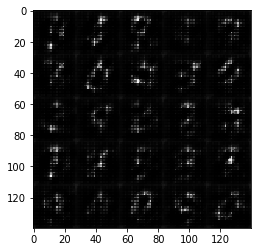

Epoch 1/2... Step 120... Discriminator Loss: 1.8227... Generator Loss: 0.7372
Epoch 1/2... Step 140... Discriminator Loss: 1.7194... Generator Loss: 0.8062
Epoch 1/2... Step 160... Discriminator Loss: 1.6699... Generator Loss: 0.8086
Epoch 1/2... Step 180... Discriminator Loss: 1.5029... Generator Loss: 0.7823
Epoch 1/2... Step 200... Discriminator Loss: 1.6264... Generator Loss: 0.7620


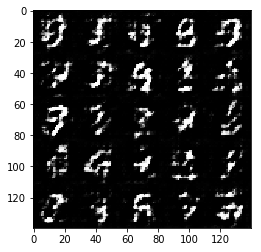

Epoch 1/2... Step 220... Discriminator Loss: 1.5117... Generator Loss: 0.7657
Epoch 1/2... Step 240... Discriminator Loss: 1.4380... Generator Loss: 0.8489
Epoch 1/2... Step 260... Discriminator Loss: 1.5794... Generator Loss: 0.6883
Epoch 1/2... Step 280... Discriminator Loss: 1.6671... Generator Loss: 0.7034
Epoch 1/2... Step 300... Discriminator Loss: 1.5388... Generator Loss: 0.8920


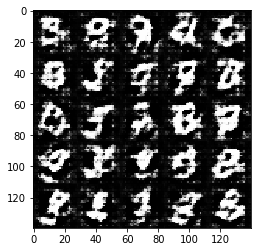

Epoch 1/2... Step 320... Discriminator Loss: 1.5286... Generator Loss: 0.7173
Epoch 1/2... Step 340... Discriminator Loss: 1.5333... Generator Loss: 0.9036
Epoch 1/2... Step 360... Discriminator Loss: 1.4242... Generator Loss: 0.8620
Epoch 1/2... Step 380... Discriminator Loss: 1.5263... Generator Loss: 0.8062
Epoch 1/2... Step 400... Discriminator Loss: 1.5537... Generator Loss: 0.8096


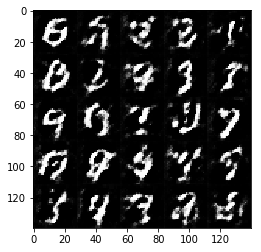

Epoch 1/2... Step 420... Discriminator Loss: 1.4454... Generator Loss: 0.8142
Epoch 1/2... Step 440... Discriminator Loss: 1.4352... Generator Loss: 0.7830
Epoch 1/2... Step 460... Discriminator Loss: 1.4816... Generator Loss: 0.8186
Epoch 1/2... Step 480... Discriminator Loss: 1.4754... Generator Loss: 0.7991
Epoch 1/2... Step 500... Discriminator Loss: 1.4561... Generator Loss: 0.8290


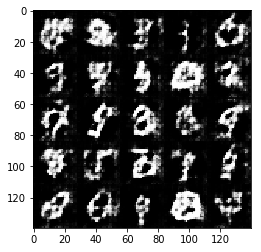

Epoch 1/2... Step 520... Discriminator Loss: 1.4479... Generator Loss: 0.8596
Epoch 1/2... Step 540... Discriminator Loss: 1.4088... Generator Loss: 0.7793
Epoch 1/2... Step 560... Discriminator Loss: 1.4426... Generator Loss: 0.8122
Epoch 1/2... Step 580... Discriminator Loss: 1.4875... Generator Loss: 0.7525
Epoch 1/2... Step 600... Discriminator Loss: 1.4069... Generator Loss: 0.8405


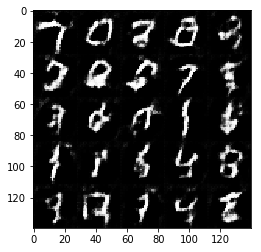

Epoch 1/2... Step 620... Discriminator Loss: 1.3539... Generator Loss: 0.8091
Epoch 1/2... Step 640... Discriminator Loss: 1.5056... Generator Loss: 0.6927
Epoch 1/2... Step 660... Discriminator Loss: 1.4355... Generator Loss: 0.8009
Epoch 1/2... Step 680... Discriminator Loss: 1.3777... Generator Loss: 0.8129
Epoch 1/2... Step 700... Discriminator Loss: 1.3906... Generator Loss: 0.7805


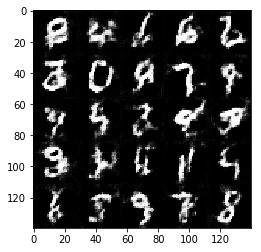

Epoch 1/2... Step 720... Discriminator Loss: 1.3986... Generator Loss: 0.7415
Epoch 1/2... Step 740... Discriminator Loss: 1.3800... Generator Loss: 0.8172
Epoch 1/2... Step 760... Discriminator Loss: 1.4120... Generator Loss: 0.9538
Epoch 1/2... Step 780... Discriminator Loss: 1.4550... Generator Loss: 0.7704
Epoch 1/2... Step 800... Discriminator Loss: 1.4548... Generator Loss: 0.8288


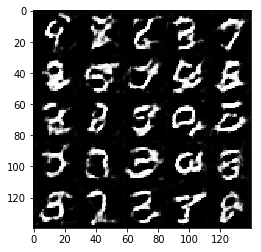

Epoch 1/2... Step 820... Discriminator Loss: 1.3877... Generator Loss: 0.7462
Epoch 1/2... Step 840... Discriminator Loss: 1.5019... Generator Loss: 0.8192
Epoch 1/2... Step 860... Discriminator Loss: 1.4531... Generator Loss: 0.7257
Epoch 1/2... Step 880... Discriminator Loss: 1.4210... Generator Loss: 0.7695
Epoch 1/2... Step 900... Discriminator Loss: 1.3493... Generator Loss: 0.8070


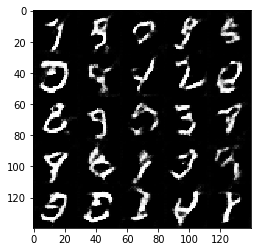

Epoch 1/2... Step 920... Discriminator Loss: 1.4249... Generator Loss: 0.7600
Epoch 2/2... Step 940... Discriminator Loss: 1.3955... Generator Loss: 0.8277
Epoch 2/2... Step 960... Discriminator Loss: 1.3744... Generator Loss: 0.8312
Epoch 2/2... Step 980... Discriminator Loss: 1.4197... Generator Loss: 0.7736
Epoch 2/2... Step 1000... Discriminator Loss: 1.3843... Generator Loss: 0.7921


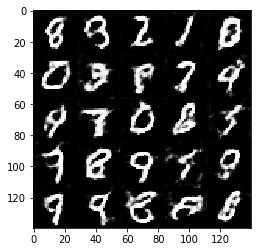

Epoch 2/2... Step 1020... Discriminator Loss: 1.3980... Generator Loss: 0.7977
Epoch 2/2... Step 1040... Discriminator Loss: 1.3128... Generator Loss: 0.7410
Epoch 2/2... Step 1060... Discriminator Loss: 1.3697... Generator Loss: 0.8063
Epoch 2/2... Step 1080... Discriminator Loss: 1.4560... Generator Loss: 0.7873
Epoch 2/2... Step 1100... Discriminator Loss: 1.3898... Generator Loss: 0.8102


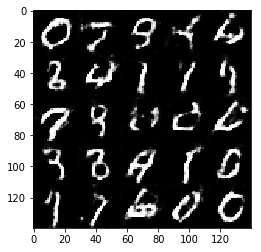

Epoch 2/2... Step 1120... Discriminator Loss: 1.4433... Generator Loss: 0.8169
Epoch 2/2... Step 1140... Discriminator Loss: 1.4139... Generator Loss: 0.8203
Epoch 2/2... Step 1160... Discriminator Loss: 1.4101... Generator Loss: 0.7295
Epoch 2/2... Step 1180... Discriminator Loss: 1.3270... Generator Loss: 0.7965
Epoch 2/2... Step 1200... Discriminator Loss: 1.4129... Generator Loss: 0.8275


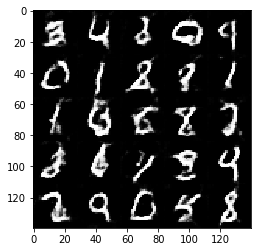

Epoch 2/2... Step 1220... Discriminator Loss: 1.3865... Generator Loss: 0.8047
Epoch 2/2... Step 1240... Discriminator Loss: 1.5114... Generator Loss: 0.7649
Epoch 2/2... Step 1260... Discriminator Loss: 1.4395... Generator Loss: 0.8274
Epoch 2/2... Step 1280... Discriminator Loss: 1.3999... Generator Loss: 0.8316
Epoch 2/2... Step 1300... Discriminator Loss: 1.3785... Generator Loss: 0.7994


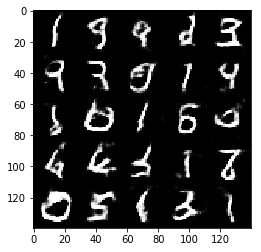

Epoch 2/2... Step 1320... Discriminator Loss: 1.4507... Generator Loss: 0.8587
Epoch 2/2... Step 1340... Discriminator Loss: 1.4477... Generator Loss: 0.8016
Epoch 2/2... Step 1360... Discriminator Loss: 1.3738... Generator Loss: 0.9042
Epoch 2/2... Step 1380... Discriminator Loss: 1.4793... Generator Loss: 0.7691
Epoch 2/2... Step 1400... Discriminator Loss: 1.3780... Generator Loss: 0.7521


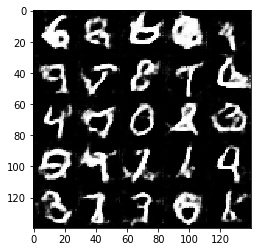

Epoch 2/2... Step 1420... Discriminator Loss: 1.4067... Generator Loss: 0.8131
Epoch 2/2... Step 1440... Discriminator Loss: 1.4145... Generator Loss: 0.8419
Epoch 2/2... Step 1460... Discriminator Loss: 1.4228... Generator Loss: 0.7443
Epoch 2/2... Step 1480... Discriminator Loss: 1.3965... Generator Loss: 0.8245
Epoch 2/2... Step 1500... Discriminator Loss: 1.4289... Generator Loss: 0.7641


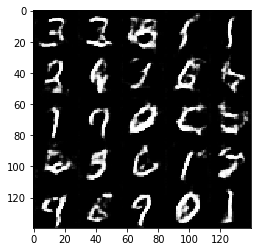

Epoch 2/2... Step 1520... Discriminator Loss: 1.3688... Generator Loss: 0.8152
Epoch 2/2... Step 1540... Discriminator Loss: 1.4218... Generator Loss: 0.8120
Epoch 2/2... Step 1560... Discriminator Loss: 1.4366... Generator Loss: 0.7838
Epoch 2/2... Step 1580... Discriminator Loss: 1.3850... Generator Loss: 0.8567
Epoch 2/2... Step 1600... Discriminator Loss: 1.3416... Generator Loss: 0.8196


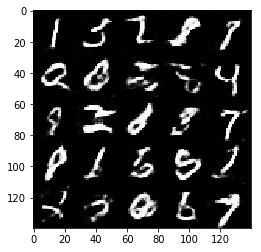

Epoch 2/2... Step 1620... Discriminator Loss: 1.3859... Generator Loss: 0.8279
Epoch 2/2... Step 1640... Discriminator Loss: 1.3531... Generator Loss: 0.8565
Epoch 2/2... Step 1660... Discriminator Loss: 1.4348... Generator Loss: 0.7010
Epoch 2/2... Step 1680... Discriminator Loss: 1.3544... Generator Loss: 0.7870
Epoch 2/2... Step 1700... Discriminator Loss: 1.4258... Generator Loss: 0.7695


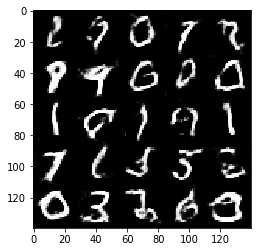

Epoch 2/2... Step 1720... Discriminator Loss: 1.3686... Generator Loss: 0.8066
Epoch 2/2... Step 1740... Discriminator Loss: 1.3982... Generator Loss: 0.7877
Epoch 2/2... Step 1760... Discriminator Loss: 1.4217... Generator Loss: 0.8144
Epoch 2/2... Step 1780... Discriminator Loss: 1.4168... Generator Loss: 0.7768
Epoch 2/2... Step 1800... Discriminator Loss: 1.4072... Generator Loss: 0.7610


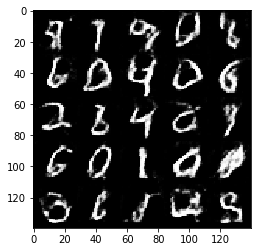

Epoch 2/2... Step 1820... Discriminator Loss: 1.3992... Generator Loss: 0.7841
Epoch 2/2... Step 1840... Discriminator Loss: 1.3988... Generator Loss: 0.7949
Epoch 2/2... Step 1860... Discriminator Loss: 1.3588... Generator Loss: 0.8561


In [12]:
batch_size = 64
z_dim = 100
learning_rate = 0.0004
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

Epoch 1/1... Step 20... Discriminator Loss: 2.5010... Generator Loss: 0.9596
Epoch 1/1... Step 40... Discriminator Loss: 1.5947... Generator Loss: 0.7079
Epoch 1/1... Step 60... Discriminator Loss: 2.3288... Generator Loss: 0.8274
Epoch 1/1... Step 80... Discriminator Loss: 2.0899... Generator Loss: 0.6455
Epoch 1/1... Step 100... Discriminator Loss: 1.6542... Generator Loss: 0.7696


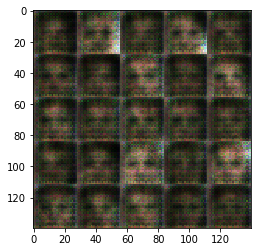

Epoch 1/1... Step 120... Discriminator Loss: 1.4608... Generator Loss: 0.8939
Epoch 1/1... Step 140... Discriminator Loss: 1.4892... Generator Loss: 0.9122
Epoch 1/1... Step 160... Discriminator Loss: 1.7531... Generator Loss: 0.7671
Epoch 1/1... Step 180... Discriminator Loss: 1.7014... Generator Loss: 0.7062
Epoch 1/1... Step 200... Discriminator Loss: 1.5515... Generator Loss: 0.7989


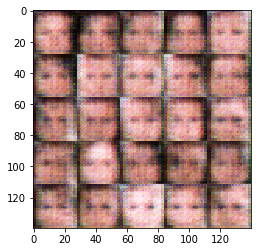

Epoch 1/1... Step 220... Discriminator Loss: 1.3749... Generator Loss: 0.9277
Epoch 1/1... Step 240... Discriminator Loss: 1.4935... Generator Loss: 0.8487
Epoch 1/1... Step 260... Discriminator Loss: 1.3488... Generator Loss: 0.9014
Epoch 1/1... Step 280... Discriminator Loss: 1.4787... Generator Loss: 0.7790
Epoch 1/1... Step 300... Discriminator Loss: 1.3944... Generator Loss: 0.8177


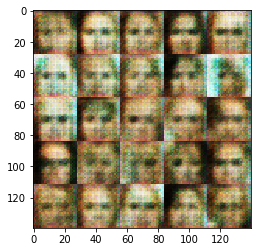

Epoch 1/1... Step 320... Discriminator Loss: 1.6274... Generator Loss: 0.7583
Epoch 1/1... Step 340... Discriminator Loss: 1.5620... Generator Loss: 0.7286
Epoch 1/1... Step 360... Discriminator Loss: 1.5427... Generator Loss: 0.9162
Epoch 1/1... Step 380... Discriminator Loss: 1.4929... Generator Loss: 0.7670
Epoch 1/1... Step 400... Discriminator Loss: 1.3318... Generator Loss: 0.8900


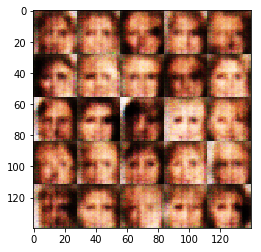

Epoch 1/1... Step 420... Discriminator Loss: 1.3583... Generator Loss: 0.8332
Epoch 1/1... Step 440... Discriminator Loss: 1.5448... Generator Loss: 0.7745
Epoch 1/1... Step 460... Discriminator Loss: 1.4282... Generator Loss: 0.7934
Epoch 1/1... Step 480... Discriminator Loss: 1.4359... Generator Loss: 0.7739
Epoch 1/1... Step 500... Discriminator Loss: 1.4991... Generator Loss: 0.8247


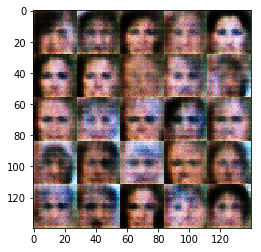

Epoch 1/1... Step 520... Discriminator Loss: 1.4168... Generator Loss: 0.8349
Epoch 1/1... Step 540... Discriminator Loss: 1.5642... Generator Loss: 0.6496
Epoch 1/1... Step 560... Discriminator Loss: 1.4368... Generator Loss: 0.7884
Epoch 1/1... Step 580... Discriminator Loss: 1.5289... Generator Loss: 0.7573
Epoch 1/1... Step 600... Discriminator Loss: 1.4346... Generator Loss: 0.7161


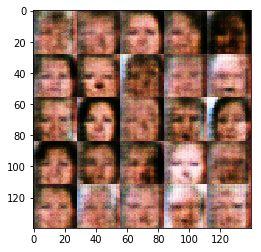

Epoch 1/1... Step 620... Discriminator Loss: 1.5134... Generator Loss: 0.7896
Epoch 1/1... Step 640... Discriminator Loss: 1.3363... Generator Loss: 0.8433
Epoch 1/1... Step 660... Discriminator Loss: 1.4103... Generator Loss: 0.8554
Epoch 1/1... Step 680... Discriminator Loss: 1.5814... Generator Loss: 0.8615
Epoch 1/1... Step 700... Discriminator Loss: 1.4187... Generator Loss: 0.8245


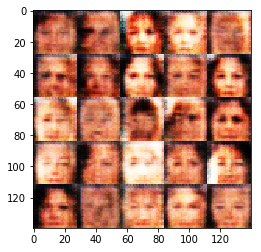

Epoch 1/1... Step 720... Discriminator Loss: 1.3860... Generator Loss: 0.9855
Epoch 1/1... Step 740... Discriminator Loss: 1.4528... Generator Loss: 0.7770
Epoch 1/1... Step 760... Discriminator Loss: 1.4174... Generator Loss: 0.6794
Epoch 1/1... Step 780... Discriminator Loss: 1.4719... Generator Loss: 0.7603
Epoch 1/1... Step 800... Discriminator Loss: 1.5067... Generator Loss: 0.7859


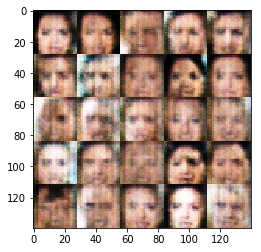

Epoch 1/1... Step 820... Discriminator Loss: 1.3725... Generator Loss: 0.7993
Epoch 1/1... Step 840... Discriminator Loss: 1.4969... Generator Loss: 0.6637
Epoch 1/1... Step 860... Discriminator Loss: 1.4874... Generator Loss: 0.7625
Epoch 1/1... Step 880... Discriminator Loss: 1.4473... Generator Loss: 0.8258
Epoch 1/1... Step 900... Discriminator Loss: 1.3804... Generator Loss: 0.7164


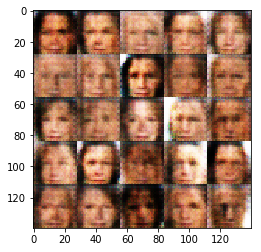

Epoch 1/1... Step 920... Discriminator Loss: 1.4752... Generator Loss: 0.7292
Epoch 1/1... Step 940... Discriminator Loss: 1.4282... Generator Loss: 0.8698
Epoch 1/1... Step 960... Discriminator Loss: 1.4554... Generator Loss: 0.7893
Epoch 1/1... Step 980... Discriminator Loss: 1.3879... Generator Loss: 0.7670
Epoch 1/1... Step 1000... Discriminator Loss: 1.4399... Generator Loss: 0.7081


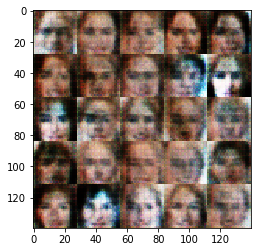

Epoch 1/1... Step 1020... Discriminator Loss: 1.3773... Generator Loss: 0.8452
Epoch 1/1... Step 1040... Discriminator Loss: 1.4467... Generator Loss: 0.8186
Epoch 1/1... Step 1060... Discriminator Loss: 1.4860... Generator Loss: 0.7061
Epoch 1/1... Step 1080... Discriminator Loss: 1.4954... Generator Loss: 0.7179
Epoch 1/1... Step 1100... Discriminator Loss: 1.4289... Generator Loss: 0.7475


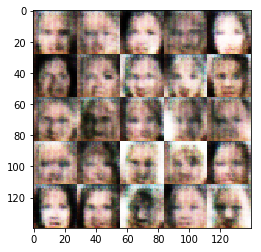

Epoch 1/1... Step 1120... Discriminator Loss: 1.4979... Generator Loss: 0.7574
Epoch 1/1... Step 1140... Discriminator Loss: 1.4822... Generator Loss: 0.8597
Epoch 1/1... Step 1160... Discriminator Loss: 1.4383... Generator Loss: 0.6818
Epoch 1/1... Step 1180... Discriminator Loss: 1.4073... Generator Loss: 0.8809
Epoch 1/1... Step 1200... Discriminator Loss: 1.4143... Generator Loss: 0.8324


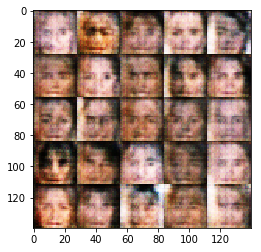

Epoch 1/1... Step 1220... Discriminator Loss: 1.3978... Generator Loss: 0.7701
Epoch 1/1... Step 1240... Discriminator Loss: 1.4081... Generator Loss: 0.8670
Epoch 1/1... Step 1260... Discriminator Loss: 1.4092... Generator Loss: 0.7834
Epoch 1/1... Step 1280... Discriminator Loss: 1.4599... Generator Loss: 0.8548
Epoch 1/1... Step 1300... Discriminator Loss: 1.3971... Generator Loss: 0.8353


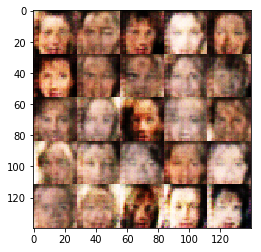

Epoch 1/1... Step 1320... Discriminator Loss: 1.4133... Generator Loss: 0.7908
Epoch 1/1... Step 1340... Discriminator Loss: 1.4450... Generator Loss: 0.7241
Epoch 1/1... Step 1360... Discriminator Loss: 1.4144... Generator Loss: 0.7700
Epoch 1/1... Step 1380... Discriminator Loss: 1.3973... Generator Loss: 0.7469
Epoch 1/1... Step 1400... Discriminator Loss: 1.4383... Generator Loss: 0.7858


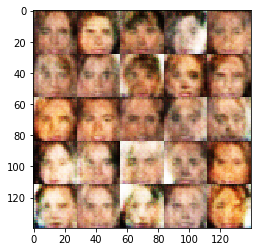

Epoch 1/1... Step 1420... Discriminator Loss: 1.3903... Generator Loss: 0.7777
Epoch 1/1... Step 1440... Discriminator Loss: 1.3660... Generator Loss: 0.8024
Epoch 1/1... Step 1460... Discriminator Loss: 1.4036... Generator Loss: 0.7367
Epoch 1/1... Step 1480... Discriminator Loss: 1.4411... Generator Loss: 0.7293
Epoch 1/1... Step 1500... Discriminator Loss: 1.4188... Generator Loss: 0.8170


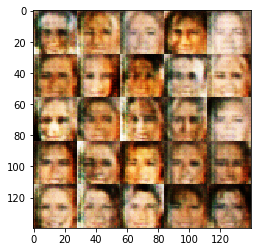

Epoch 1/1... Step 1520... Discriminator Loss: 1.4166... Generator Loss: 0.7591
Epoch 1/1... Step 1540... Discriminator Loss: 1.4282... Generator Loss: 0.7760
Epoch 1/1... Step 1560... Discriminator Loss: 1.3920... Generator Loss: 0.7507
Epoch 1/1... Step 1580... Discriminator Loss: 1.4618... Generator Loss: 0.7057
Epoch 1/1... Step 1600... Discriminator Loss: 1.4517... Generator Loss: 0.7744


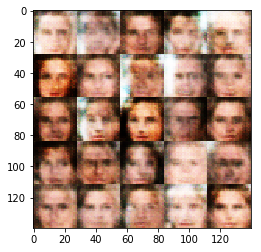

Epoch 1/1... Step 1620... Discriminator Loss: 1.4681... Generator Loss: 0.7213
Epoch 1/1... Step 1640... Discriminator Loss: 1.4013... Generator Loss: 0.7918
Epoch 1/1... Step 1660... Discriminator Loss: 1.3906... Generator Loss: 0.7848
Epoch 1/1... Step 1680... Discriminator Loss: 1.3812... Generator Loss: 0.8288
Epoch 1/1... Step 1700... Discriminator Loss: 1.4139... Generator Loss: 0.7642


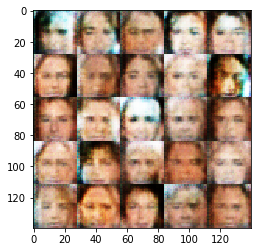

Epoch 1/1... Step 1720... Discriminator Loss: 1.3899... Generator Loss: 0.8480
Epoch 1/1... Step 1740... Discriminator Loss: 1.4148... Generator Loss: 0.7479
Epoch 1/1... Step 1760... Discriminator Loss: 1.3780... Generator Loss: 0.8040
Epoch 1/1... Step 1780... Discriminator Loss: 1.3732... Generator Loss: 0.8398
Epoch 1/1... Step 1800... Discriminator Loss: 1.3997... Generator Loss: 0.8059


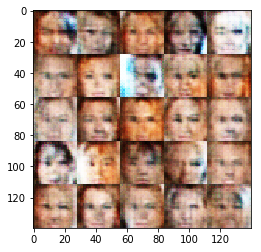

Epoch 1/1... Step 1820... Discriminator Loss: 1.3919... Generator Loss: 0.6777
Epoch 1/1... Step 1840... Discriminator Loss: 1.4723... Generator Loss: 0.8478
Epoch 1/1... Step 1860... Discriminator Loss: 1.3562... Generator Loss: 0.8418
Epoch 1/1... Step 1880... Discriminator Loss: 1.4610... Generator Loss: 0.7789
Epoch 1/1... Step 1900... Discriminator Loss: 1.3882... Generator Loss: 0.7754


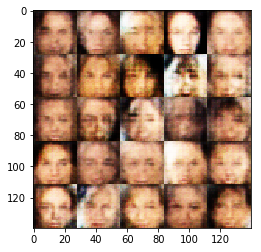

Epoch 1/1... Step 1920... Discriminator Loss: 1.4228... Generator Loss: 0.7994
Epoch 1/1... Step 1940... Discriminator Loss: 1.3676... Generator Loss: 0.7954
Epoch 1/1... Step 1960... Discriminator Loss: 1.3926... Generator Loss: 0.8171
Epoch 1/1... Step 1980... Discriminator Loss: 1.4231... Generator Loss: 0.8695
Epoch 1/1... Step 2000... Discriminator Loss: 1.3637... Generator Loss: 0.8176


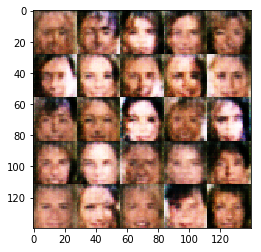

Epoch 1/1... Step 2020... Discriminator Loss: 1.4556... Generator Loss: 0.7635
Epoch 1/1... Step 2040... Discriminator Loss: 1.4242... Generator Loss: 0.7438
Epoch 1/1... Step 2060... Discriminator Loss: 1.3995... Generator Loss: 0.8236
Epoch 1/1... Step 2080... Discriminator Loss: 1.4226... Generator Loss: 0.7645
Epoch 1/1... Step 2100... Discriminator Loss: 1.3503... Generator Loss: 0.8271


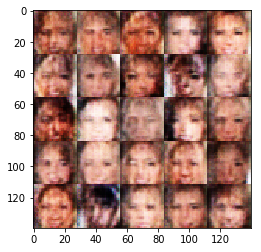

Epoch 1/1... Step 2120... Discriminator Loss: 1.3672... Generator Loss: 0.7817
Epoch 1/1... Step 2140... Discriminator Loss: 1.3941... Generator Loss: 0.7549
Epoch 1/1... Step 2160... Discriminator Loss: 1.4146... Generator Loss: 0.7629
Epoch 1/1... Step 2180... Discriminator Loss: 1.4278... Generator Loss: 0.7715
Epoch 1/1... Step 2200... Discriminator Loss: 1.4306... Generator Loss: 0.7682


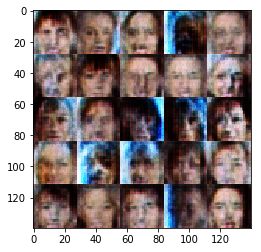

Epoch 1/1... Step 2220... Discriminator Loss: 1.3974... Generator Loss: 0.8196
Epoch 1/1... Step 2240... Discriminator Loss: 1.4171... Generator Loss: 0.7739
Epoch 1/1... Step 2260... Discriminator Loss: 1.4302... Generator Loss: 0.8040
Epoch 1/1... Step 2280... Discriminator Loss: 1.3772... Generator Loss: 0.7637
Epoch 1/1... Step 2300... Discriminator Loss: 1.4120... Generator Loss: 0.7793


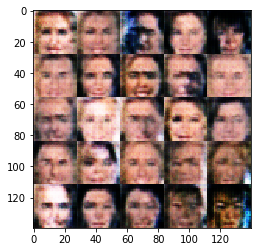

Epoch 1/1... Step 2320... Discriminator Loss: 1.3787... Generator Loss: 0.7467
Epoch 1/1... Step 2340... Discriminator Loss: 1.4882... Generator Loss: 0.7420
Epoch 1/1... Step 2360... Discriminator Loss: 1.3919... Generator Loss: 0.8096
Epoch 1/1... Step 2380... Discriminator Loss: 1.3593... Generator Loss: 0.8747
Epoch 1/1... Step 2400... Discriminator Loss: 1.4057... Generator Loss: 0.9061


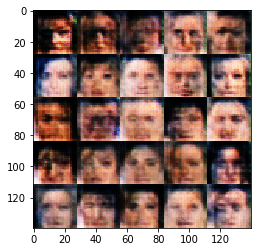

Epoch 1/1... Step 2420... Discriminator Loss: 1.4479... Generator Loss: 0.7120
Epoch 1/1... Step 2440... Discriminator Loss: 1.4017... Generator Loss: 0.8494
Epoch 1/1... Step 2460... Discriminator Loss: 1.3630... Generator Loss: 0.7439
Epoch 1/1... Step 2480... Discriminator Loss: 1.3975... Generator Loss: 0.7791
Epoch 1/1... Step 2500... Discriminator Loss: 1.4489... Generator Loss: 0.8178


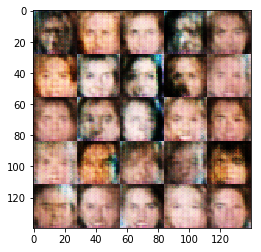

Epoch 1/1... Step 2520... Discriminator Loss: 1.4364... Generator Loss: 0.9080
Epoch 1/1... Step 2540... Discriminator Loss: 1.3748... Generator Loss: 0.8502
Epoch 1/1... Step 2560... Discriminator Loss: 1.3653... Generator Loss: 0.7998
Epoch 1/1... Step 2580... Discriminator Loss: 1.4346... Generator Loss: 0.7816
Epoch 1/1... Step 2600... Discriminator Loss: 1.4344... Generator Loss: 0.7625


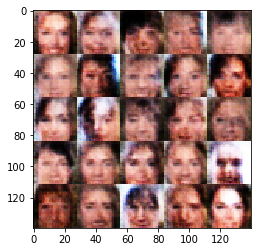

Epoch 1/1... Step 2620... Discriminator Loss: 1.3474... Generator Loss: 0.8100
Epoch 1/1... Step 2640... Discriminator Loss: 1.4735... Generator Loss: 0.8837
Epoch 1/1... Step 2660... Discriminator Loss: 1.4096... Generator Loss: 0.7876
Epoch 1/1... Step 2680... Discriminator Loss: 1.4210... Generator Loss: 0.8825
Epoch 1/1... Step 2700... Discriminator Loss: 1.4414... Generator Loss: 0.7799


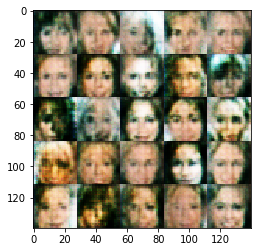

Epoch 1/1... Step 2720... Discriminator Loss: 1.4232... Generator Loss: 0.8706
Epoch 1/1... Step 2740... Discriminator Loss: 1.4902... Generator Loss: 0.8930
Epoch 1/1... Step 2760... Discriminator Loss: 1.3861... Generator Loss: 0.7228
Epoch 1/1... Step 2780... Discriminator Loss: 1.3943... Generator Loss: 0.7955
Epoch 1/1... Step 2800... Discriminator Loss: 1.4057... Generator Loss: 0.7330


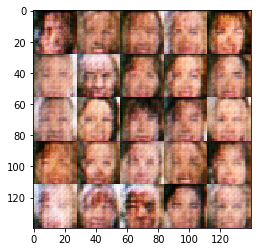

Epoch 1/1... Step 2820... Discriminator Loss: 1.4594... Generator Loss: 0.7985
Epoch 1/1... Step 2840... Discriminator Loss: 1.3927... Generator Loss: 0.8077
Epoch 1/1... Step 2860... Discriminator Loss: 1.4422... Generator Loss: 0.8833
Epoch 1/1... Step 2880... Discriminator Loss: 1.3624... Generator Loss: 0.8117
Epoch 1/1... Step 2900... Discriminator Loss: 1.4186... Generator Loss: 0.7564


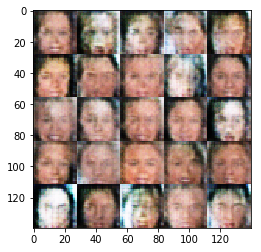

Epoch 1/1... Step 2920... Discriminator Loss: 1.4015... Generator Loss: 0.7853
Epoch 1/1... Step 2940... Discriminator Loss: 1.4972... Generator Loss: 0.6782
Epoch 1/1... Step 2960... Discriminator Loss: 1.3980... Generator Loss: 0.8248
Epoch 1/1... Step 2980... Discriminator Loss: 1.3987... Generator Loss: 0.7975
Epoch 1/1... Step 3000... Discriminator Loss: 1.3714... Generator Loss: 0.7811


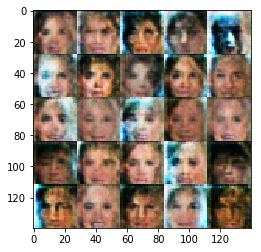

Epoch 1/1... Step 3020... Discriminator Loss: 1.3681... Generator Loss: 0.8650
Epoch 1/1... Step 3040... Discriminator Loss: 1.4070... Generator Loss: 0.7410
Epoch 1/1... Step 3060... Discriminator Loss: 1.3765... Generator Loss: 0.7732
Epoch 1/1... Step 3080... Discriminator Loss: 1.3782... Generator Loss: 0.7509
Epoch 1/1... Step 3100... Discriminator Loss: 1.3939... Generator Loss: 0.8387


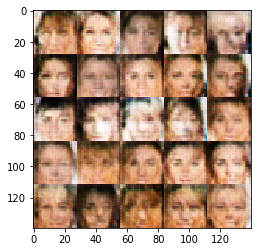

Epoch 1/1... Step 3120... Discriminator Loss: 1.3735... Generator Loss: 0.7731
Epoch 1/1... Step 3140... Discriminator Loss: 1.3910... Generator Loss: 0.8690
Epoch 1/1... Step 3160... Discriminator Loss: 1.4347... Generator Loss: 0.7871


In [13]:
batch_size = 64
z_dim = 100
learning_rate = 0.0004
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.